In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn import preprocessing
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [43]:
#importing the dataset and doing preprocessing...
header_list = ["Gender", "Symptoms", "Alcohol", "Hepatitis B Surface Antigen", "Hepatitis B e Antigen", "Hepatitis B Core Antibody", "Hepatitis C Virus Antibody",
"Cirrhosis", "Endemic Countries", "Smoking", "Diabetes", "Obesity", "Hemochromatosis", "Arterial Hypertension", "Chronic Renal Insufficiency",
"Human Immunodeficiency Virus", "Nonalcoholic Steatohepatitis", "Esophageal Varices", "Splenomegaly", "Portal Hypertension", "Portal Vein Thrombosis", "Liver Metastasis",
"Radiological Hallmark", "Age at diagnosis", "Grams of Alcohol per day", "Packs of cigarets per year", "Performance Status", "Encefalopathy degree", "Ascites degree",
"International Normalised Ratio", "Alpha-Fetoprotein", "Haemoglobin", "Mean Corpuscular Volume", "Leukocytes", "Platelets", "Albumin", "Total Bilirubin",
"Alanine transaminase", "Aspartate transaminase", "Gamma glutamyl transferase", "Alkaline phosphatase", "Total Proteins", "Creatinine", "Number of Nodules",
"Major dimension of nodule", "Direct Bilirubin", "Iron", "Oxygen Saturation", "Ferritin", "Class"]

dataset = pd.read_csv("hcc-data.txt", names = header_list)
dataset = dataset.replace({'?': np.nan})
for col in dataset:
  dataset[col]=dataset[col].astype(np.float)
dataset['Class']=dataset['Class'].astype(np.int)
#print(type(dataset['Class'][0]))
print(dataset.mean())
#Handling missing values...
dataset = dataset.fillna(dataset.mean())
print(dataset['Class'])
dataset.head()

Gender                                 0.806061
Symptoms                               0.639456
Alcohol                                0.739394
Hepatitis B Surface Antigen            0.108108
Hepatitis B e Antigen                  0.007937
Hepatitis B Core Antibody              0.269504
Hepatitis C Virus Antibody             0.217949
Cirrhosis                              0.903030
Endemic Countries                      0.079365
Smoking                                0.508065
Diabetes                               0.345679
Obesity                                0.129032
Hemochromatosis                        0.049296
Arterial Hypertension                  0.364198
Chronic Renal Insufficiency            0.122699
Human Immunodeficiency Virus           0.019868
Nonalcoholic Steatohepatitis           0.055944
Esophageal Varices                     0.610619
Splenomegaly                           0.560000
Portal Hypertension                    0.714286
Portal Vein Thrombosis                 0

,Gender,Symptoms,Alcohol,Hepatitis B Surface Antigen,Hepatitis B e Antigen,Hepatitis B Core Antibody,Hepatitis C Virus Antibody,Cirrhosis,Endemic Countries,Smoking,Diabetes,Obesity,Hemochromatosis,Arterial Hypertension,Chronic Renal Insufficiency,Human Immunodeficiency Virus,Nonalcoholic Steatohepatitis,Esophageal Varices,Splenomegaly,Portal Hypertension,Portal Vein Thrombosis,Liver Metastasis,Radiological Hallmark,Age at diagnosis,Grams of Alcohol per day,Packs of cigarets per year,Performance Status,Encefalopathy degree,Ascites degree,International Normalised Ratio,Alpha-Fetoprotein,Haemoglobin,Mean Corpuscular Volume,Leukocytes,Platelets,Albumin,Total Bilirubin,Alanine transaminase,Aspartate transaminase,Gamma glutamyl transferase,Alkaline phosphatase,Total Proteins,Creatinine,Number of Nodules,Major dimension of nodule,Direct Bilirubin,Iron,Oxygen Saturation,Ferritin,Class
0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.129032,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,137.0,15.000000,0.0,1.0,1.0,1.530000,95.000000,13.700000,106.600000,4.900000,99.000000,3.400000,2.100000,34.000000,41.000000,183.000000,150.000000,7.100000,0.700000,1.0,3.5,0.50,85.598837,37.028941,438.997647,1
1,0.0,0.639456,0.0,0.0,0.0,0.0,1.0,1.0,0.079365,0.508065,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,62.0,0.0,20.464286,0.0,1.0,1.0,1.421851,19299.951146,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,1.0,1.8,1.93,85.598837,37.028941,438.997647,1
2,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,78.0,50.0,50.000000,2.0,1.0,2.0,0.960000,5.800000,8.900000,79.800000,8.400000,472.000000,3.300000,0.400000,58.000000,68.000000,202.000000,109.000000,7.000000,2.100000,5.0,13.0,0.10,28.000000,6.000000,16.000000,1
3,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,1.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,77.0,40.0,30.000000,0.0,1.0,1.0,0.950000,2440.000000,13.400000,97.100000,9.000000,279.000000,3.700000,0.400000,16.000000,64.000000,94.000000,174.000000,8.100000,1.110000,2.0,15.7,0.20,85.598837,37.028941,438.997647,0
4,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.000000,1.000000,0.0,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0,100.0,30.000000,0.0,1.0,1.0,0.940000,49.000000,14.300000,95.100000,6.400000,199.000000,4.100000,0.700000,147.000000,306.000000,173.000000,109.000000,6.900000,1.800000,1.0,9.0,1.93,59.000000,15.000000,22.000000,1


In [44]:
#splits dataset into train, test in ratio 80:20 and does normalization on data
def train_test_split(s_dataset):
    features = s_dataset.columns
    k = int(len(s_dataset.index)*0.8)
    training_data = s_dataset.iloc[:k].reset_index(drop=True)
    testing_data = s_dataset.iloc[k:].reset_index(drop=True)
    scalar = preprocessing.StandardScaler()
    training_data = scalar.fit_transform(training_data)
    testing_data = scalar.transform(testing_data)
    return pd.DataFrame(data = training_data, columns = features), pd.DataFrame(data = testing_data, columns = features)

In [45]:
# splitting into train_X, train_Y, test_X, test_Y
dataset = dataset.sample(frac = 1, random_state = 0).reset_index(drop = True)
training_data,testing_data = train_test_split(dataset)
train_X = copy.deepcopy(training_data)
train_X = train_X.drop(['Class'], axis = 1)
train_Y = copy.deepcopy(training_data)
train_Y = train_Y['Class']
for i in range(len(train_Y)):
  if train_Y[i]>0:
    train_Y[i]=1
  else:
    train_Y[i]=0
test_X = copy.deepcopy(testing_data)
test_X = test_X.drop(['Class'], axis = 1)
test_Y = copy.deepcopy(testing_data)
test_Y = test_Y['Class']
for i in range(len(test_Y)):
  if test_Y[i]>0:
    test_Y[i]=1
  else:
    test_Y[i]=0

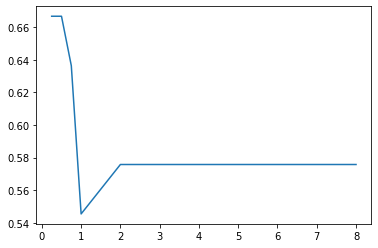

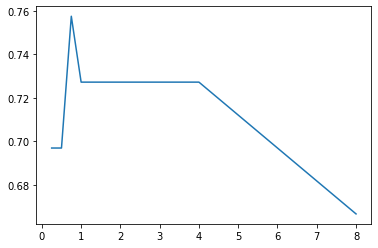

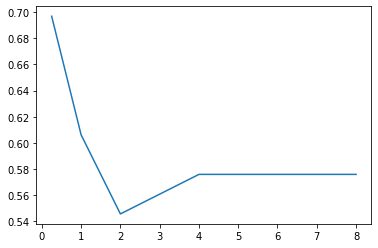

In [46]:
#binary svm classifier
c_values = [0.25, 0.5, 0.75, 1, 2, 4, 8]
acc_linear = []
acc_quadratic = []
acc_rbf = []
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'linear')
  clf = clf.fit(train_X,train_Y)
  acc_linear.append(clf.score(test_X,test_Y))
plt.plot(c_values,acc_linear)
plt.show()
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'poly', degree = 2)
  clf = clf.fit(train_X,train_Y)
  acc_quadratic.append(clf.score(test_X,test_Y))
plt.plot(c_values,acc_quadratic)
plt.show()
for x in c_values:
  clf = svm.SVC(C = x, kernel = 'rbf')
  clf = clf.fit(train_X,train_Y)
  acc_rbf.append(clf.score(test_X,test_Y))
plt.plot(c_values,acc_rbf)
plt.show()

# MLP

In [64]:
classifier = MLPClassifier(hidden_layer_sizes=() ,max_iter=300,activation = 'logistic',solver='sgd',random_state=1)

In [65]:
classifier.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [66]:
y_pred = classifier.predict(test_X)

In [67]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [68]:
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, test_Y)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.6363636363636364
